In [1]:
#example from Demo of DBSCAN clustering algorithm at http://scikit-learn.org/
%matplotlib inline 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons
import matplotlib.pyplot as plt

/Users/jcapde87/Envs/udg_seminar/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


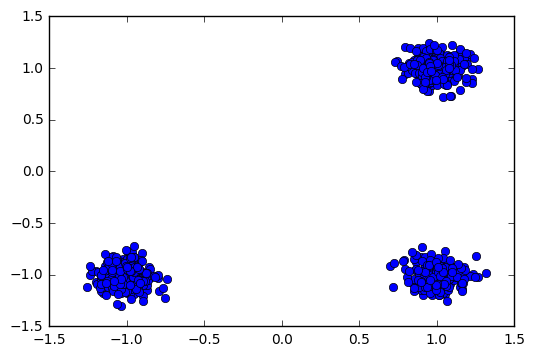

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.1, random_state=0)
plt.plot(X[:,0],X[:,1], 'o')

plt.show()

In [3]:
db = DBSCAN(eps=0.2, min_samples=20).fit(X)

/Users/jcapde87/Envs/udg_seminar/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


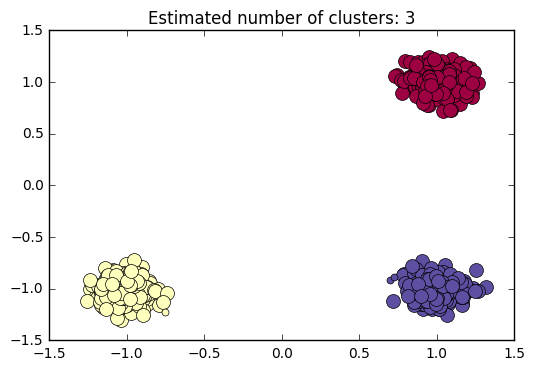

In [4]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

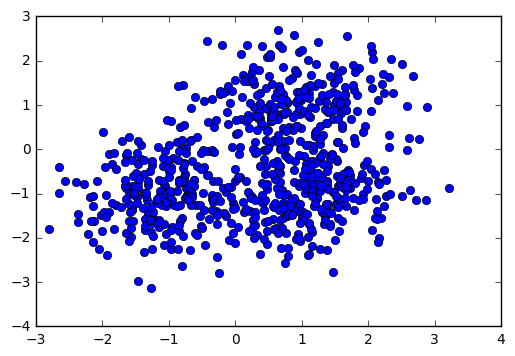

In [8]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.7, random_state=0)

plt.plot(X[:,0],X[:,1], 'o')
plt.show()

In [9]:
db = DBSCAN(eps=0.3, min_samples=20).fit(X)

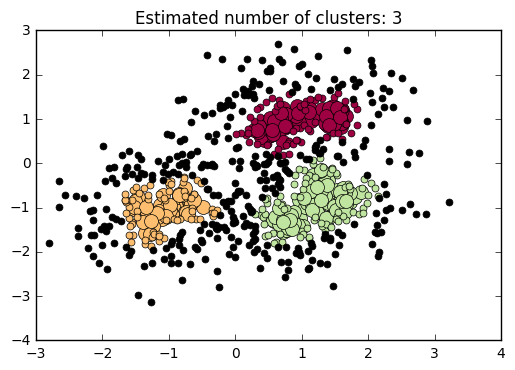

In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

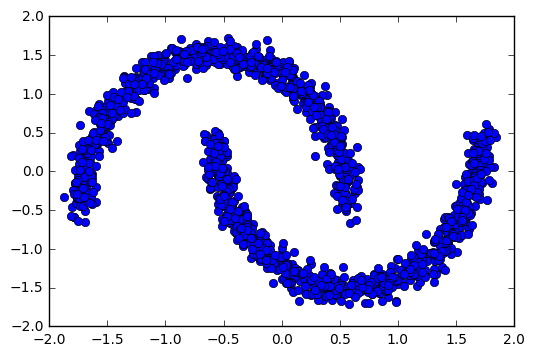

In [11]:
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
X_noisy_moons = StandardScaler().fit_transform(noisy_moons[0])
plt.plot(X_noisy_moons[:,0],X_noisy_moons[:,1], 'o')
plt.show()

In [12]:
db = DBSCAN(eps=0.3, min_samples=50).fit(X_noisy_moons)

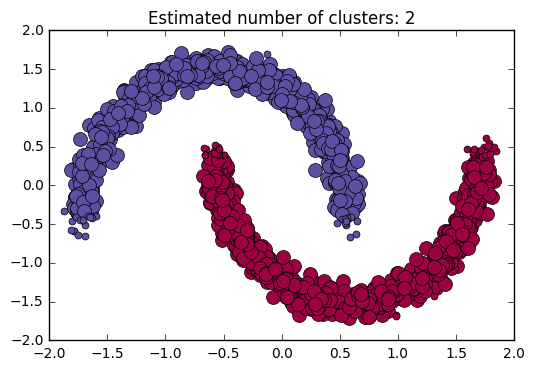

In [13]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_noisy_moons[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    xy = X_noisy_moons[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()